In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


In [157]:

df_muts  = pd.read_csv("../sandbox/PyR0_Ranked_Mutations.tsv", sep="\t")
df_muts["Category"] = df_muts["mutation"].apply(lambda z: z.split(':')[0])
df_muts["Mutation"] = df_muts["mutation"].apply(lambda z: z.split(':')[1])
df_muts.rename(columns={"Run date": "RunDate",
                            "rank": "Rank"},
                inplace=True)
df_muts['RunDate'] = pd.to_datetime(df_muts['RunDate'])


df_muts["AvgRank"] = df_muts.groupby(["Category", "RunDate"])["Rank"].transform("mean")
df_muts["MaxRank"] = df_muts.groupby(["Category", "RunDate"])["Rank"].transform("min")


In [158]:
df_muts

,Rank,mutation,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages,RunDate,Category,Mutation,AvgRank,MaxRank
0,1,S:R346K,4611.430,4617700.0,0.094890,0.094850,0.094930,1.099540,1.099490,1.099580,"A.30, AY.33.2 (B.1.617.2.33.2), B.1.415.1, B.1...",2021-03-12,S,R346K,1386.529289,1
1,2,M:D3N,3843.020,3207010.0,0.120831,0.120769,0.120892,1.128430,1.128360,1.128500,"B.1.1.529, BA.2 (B.1.1.529.2), BA.5 (B.1.1.529...",2021-03-12,M,D3N,1513.673913,2
2,3,S:F486V,3180.000,2195890.0,0.116173,0.116101,0.116245,1.123190,1.123110,1.123270,"B.1.1.529, BA.2 (B.1.1.529.2), BA.4 (B.1.1.529...",2021-03-12,S,F486V,1386.529289,1
3,4,S:L452Q,3034.550,1999600.0,0.095844,0.095782,0.095906,1.100590,1.100520,1.100660,"B.1.1.374, BA.2.12.1 (B.1.1.529.2.12.1), BG.1 ...",2021-03-12,S,L452Q,1386.529289,1
4,5,ORF9b:D16G,2997.790,1951450.0,0.100566,0.100500,0.100631,1.105800,1.105720,1.105870,"B.1, B.1.1.529, B.1.631, BA.5 (B.1.1.529.5), B...",2021-03-12,ORF9b,D16G,1252.741935,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156885,3788,ORF1a:I2230T,-294.092,-18784.0,-0.006789,-0.006834,-0.006744,0.993234,0.993189,0.993279,"B.1.1.7, Q.1 (B.1.1.7.1), Q.2 (B.1.1.7.2), Q.3...",2024-01-04,ORF1a,I2230T,1924.222222,3
156886,3789,S:A570D,-310.162,-20892.5,-0.006844,-0.006887,-0.006801,0.993179,0.993136,0.993222,"B.1.1.7, Q.1 (B.1.1.7.1), Q.2 (B.1.1.7.2), Q.3...",2024-01-04,S,A570D,1950.870542,1
156887,3790,ORF1a:A1708D,-319.180,-22124.9,-0.006912,-0.006955,-0.006870,0.993112,0.993070,0.993154,"B.1.1.7, Q.1 (B.1.1.7.1), Q.2 (B.1.1.7.2), Q.3...",2024-01-04,ORF1a,A1708D,1924.222222,3
156888,3791,ORF1a:T1001I,-319.782,-22208.5,-0.006956,-0.006998,-0.006913,0.993068,0.993026,0.993111,"B.1.1.7, B.1.36.29, CR.1.1 (B.1.1.529.5.2.18.1...",2024-01-04,ORF1a,T1001I,1924.222222,3


In [159]:
df_muts["Category"].unique()

array(['S', 'M', 'ORF9b', 'ORF1b', 'ORF3a', 'E', 'N', 'ORF1a', 'ORF10',
       'ORF7b', 'ORF6', 'ORF14', 'ORF7a', 'ORF8'], dtype=object)

In [160]:
len(df_muts["Mutation"].unique())

4390

In [161]:
df_muts["RunDate"]

0        2021-03-12
1        2021-03-12
2        2021-03-12
3        2021-03-12
4        2021-03-12
            ...    
156885   2024-01-04
156886   2024-01-04
156887   2024-01-04
156888   2024-01-04
156889   2024-01-04
Name: RunDate, Length: 156890, dtype: datetime64[ns]

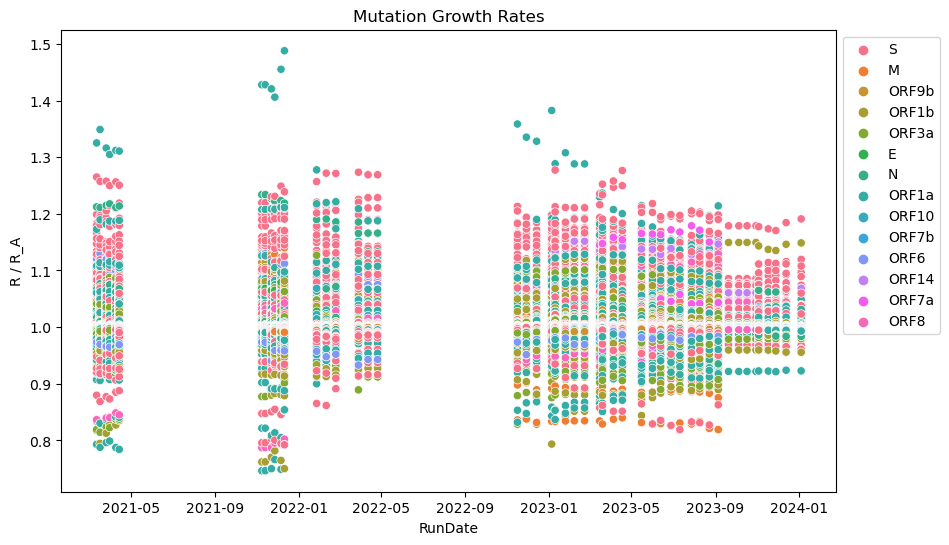

In [162]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data = df_muts,
                x = "RunDate",
                y = "R / R_A",
                hue = "Category")
ax.set_title("Mutation Growth Rates")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

Text(0.5, 1.0, 'Average Rank of COVID-19 Mutation Categories')

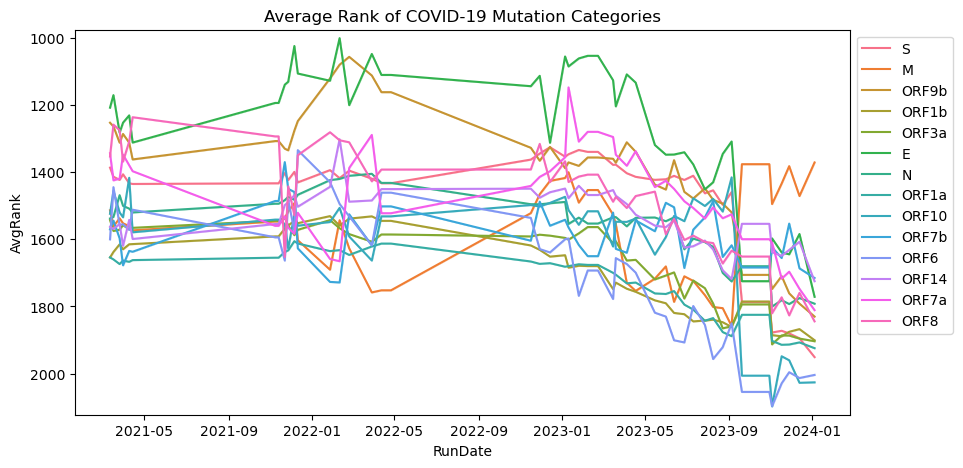

In [163]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = df_muts,
                x = "RunDate",
                y = "AvgRank",
                hue = "Category")
ax.set_ylim([max(df_muts["AvgRank"])+25, min(df_muts["AvgRank"])-25])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title("Average Rank of COVID-19 Mutation Categories")

Text(0.5, 1.0, 'Highest Rank of COVID-19 Mutation Categories')

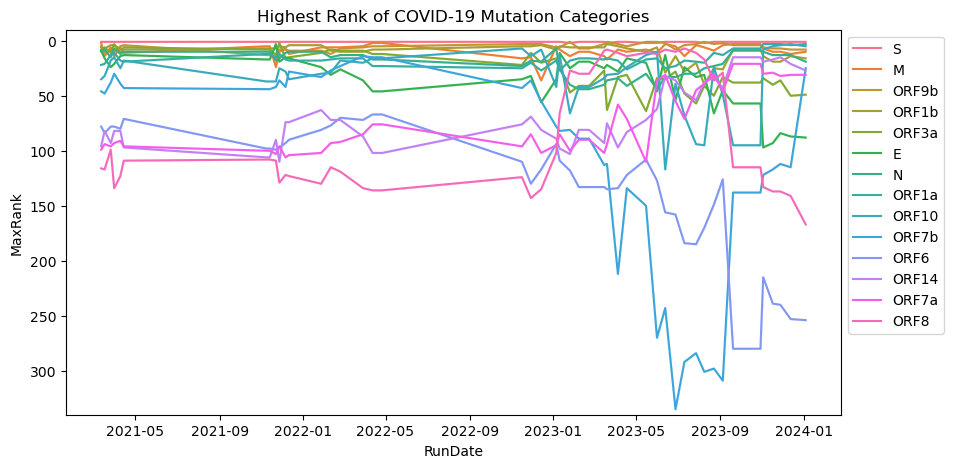

In [164]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = df_muts,
                x = "RunDate",
                y = "MaxRank",
                hue = "Category")
ax.set_ylim([max(df_muts["MaxRank"])+5, -10])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title("Highest Rank of COVID-19 Mutation Categories")

In [165]:
df_inf = pd.read_csv("../sandbox/infectivity_mutation_effects.csv")
df_inf.rename(columns={"Effect": "Infectivity",
                       "N": "N_inf"},
              inplace=True)
df_inf

,Mutation,Infectivity,N_inf
0,S704L,1.151122,48.0
1,E484V,0.966544,30.0
2,V83A,0.947953,72.0
3,N501Y,0.760468,360.0
4,K356T,0.682041,24.0
...,...,...,...
136,H655Y,-0.693031,354.0
137,S155R,-0.714798,55.0
138,A701V,-1.037817,6.0
139,R403T,-1.337216,12.0


In [166]:
df_neut = pd.read_csv("../sandbox/neutralization_mutation_effects_across_pools.csv")
df_neut.rename(columns={"Mean Effect": "Neutralization",
                        "N": "N_neut"},
              inplace=True)
df_neut

,Mutation,Neutralization,N_neut
0,K444T,-0.656364,61.0
1,F486S,-0.625525,367.0
2,L452R,-0.578281,620.0
3,K417N,-0.526447,1295.0
4,F486P,-0.471236,19.0
...,...,...,...
105,S704L,0.187463,313.0
106,T478K,0.192459,1447.0
107,K417V,0.227401,175.0
108,G339H,0.245320,451.0


In [167]:
df_temp = df_muts.merge(df_inf, on="Mutation", how="inner")
df = df_temp.merge(df_neut, on="Mutation", how="inner")
df = df.sort_values(by="RunDate")
df

,Rank,mutation,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages,RunDate,Category,Mutation,AvgRank,MaxRank,Infectivity,N_inf,Neutralization,N_neut
0,1,S:R346K,4611.4300,4.617700e+06,0.094890,0.094850,0.094930,1.099540,1.099490,1.099580,"A.30, AY.33.2 (B.1.617.2.33.2), B.1.415.1, B.1...",2021-03-12,S,R346K,1386.529289,1,0.368768,12.0,-0.109316,109.0
1680,91,S:N460K,320.7790,2.234720e+04,0.060502,0.060133,0.060872,1.062370,1.061980,1.062760,"B.1.638, BA.2 (B.1.1.529.2), BA.2.3.20 (B.1.1....",2021-03-12,S,N460K,1386.529289,1,0.451088,207.0,-0.096336,804.0
1728,92,S:I210V,316.0040,2.168690e+04,0.052890,0.052562,0.053218,1.054310,1.053970,1.054660,"BA.2 (B.1.1.529.2), BA.2.75 (B.1.1.529.2.75), ...",2021-03-12,S,I210V,1386.529289,1,0.409222,87.0,-0.126627,395.0
192,12,S:T19I,2409.4400,1.260630e+06,0.056989,0.056943,0.057036,1.058640,1.058600,1.058690,"B.1.1.529, B.1.635, BA.2 (B.1.1.529.2), BA.2.1...",2021-03-12,S,T19I,1386.529289,1,-0.048902,324.0,0.080576,1326.0
1776,97,S:G339H,294.7920,1.887340e+04,0.056420,0.056045,0.056795,1.058040,1.057650,1.058440,"BA.2 (B.1.1.529.2), BA.2.75 (B.1.1.529.2.75), ...",2021-03-12,S,G339H,1386.529289,1,-0.212933,144.0,0.245320,451.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,22,S:E484K,373.9710,3.037190e+04,0.015393,0.015313,0.015474,1.015510,1.015430,1.015590,"A.30, AT.1 (B.1.1.370.1), AV.1 (B.1.1.482.1), ...",2024-01-04,S,E484K,1950.870542,1,0.326374,27.0,-0.128327,46.0
2063,181,S:T547K,76.5150,1.273580e+03,0.011511,0.011216,0.011806,1.011580,1.011280,1.011880,"BA.1 (B.1.1.529.1), BA.1.1 (B.1.1.529.1.1), BA...",2024-01-04,S,T547K,1950.870542,1,0.113903,9.0,0.026395,21.0
143,185,S:L452Q,71.3043,1.106290e+03,0.006702,0.006518,0.006886,1.006720,1.006540,1.006910,"B.1.1.374, BA.2.12.1 (B.1.1.529.2.12.1), BA.2....",2024-01-04,S,L452Q,1950.870542,1,0.019514,39.0,-0.188671,267.0
1295,120,S:N440K,157.6930,5.402410e+03,0.071332,0.070445,0.072219,1.073940,1.072990,1.074890,"B.1.1.420, B.1.36.29, B.1.619, BA.2.13 (B.1.1....",2024-01-04,S,N440K,1950.870542,1,-0.103185,351.0,-0.058481,1401.0


In [168]:
df["Infectivity"].corr(df["Neutralization"])

-0.0425554808314882

Text(0.5, 1.0, 'Neutralization vs Infectivity')

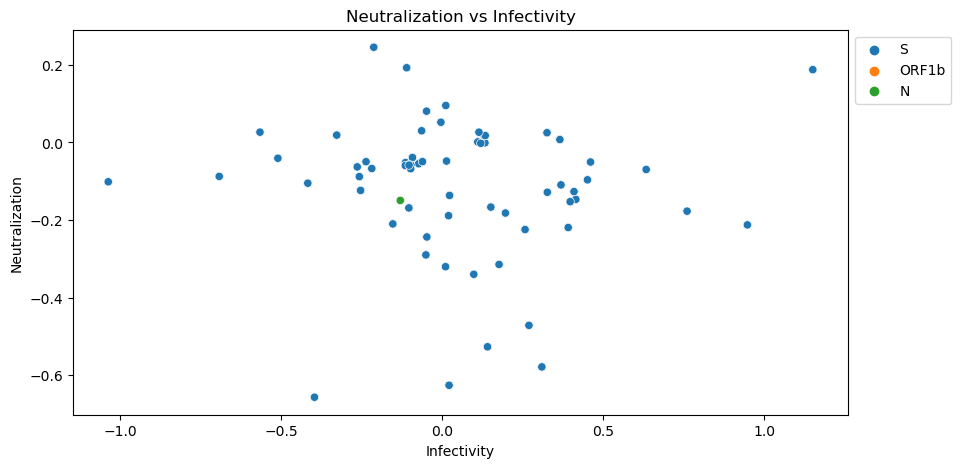

In [169]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = df,
                x = "Infectivity",
                y = "Neutralization",
                hue = "Category")

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title("Neutralization vs Infectivity")

In [170]:
ind = "Δ log R"

In [171]:
date = []
intercept = []
inf = []
neut = []
r2 = []

for d in df["RunDate"].unique():
    subset = df[df["RunDate"]==d]
    X = subset[["Infectivity", "Neutralization"]]
    y = subset[f"{ind}"]
    model = LinearRegression()
    model.fit(X,y)
    r_squared = model.score(X, y)
    date.append(d)
    intercept.append(model.intercept_)
    inf.append(model.coef_[0])
    neut.append(model.coef_[1])
    r2.append(r_squared)
    
results_linreg = pd.DataFrame({"Date": date,
                               "Intercept": intercept,
                               "Infectivity": inf,
                               "Neutralization": neut,
                               "R2": r2})

results_linreg = pd.melt(results_linreg, id_vars= ["Date"], var_name = "Metric", value_name = "Value")
results_linreg


,Date,Metric,Value
0,2021-03-12,Intercept,0.039896
1,2021-03-17,Intercept,0.040430
2,2021-03-26,Intercept,0.039554
3,2021-03-31,Intercept,0.040734
4,2021-04-09,Intercept,0.039773
...,...,...,...
187,2023-11-03,R2,0.101936
188,2023-11-17,R2,0.101171
189,2023-11-28,R2,0.100983
190,2023-12-13,R2,0.100519


In [172]:
metric_palette = {"Intercept": "RoyalBlue",
                  "Infectivity": "DarkOrange",
                  "Neutralization": "ForestGreen"}

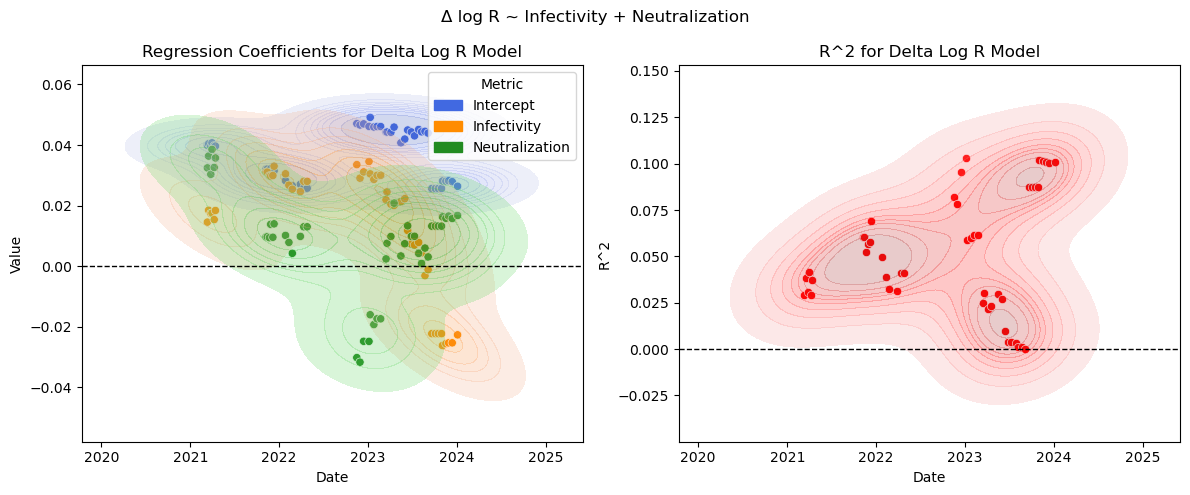

In [173]:
coefs_linreg = results_linreg[(results_linreg["Metric"]=="Intercept")|(results_linreg["Metric"]=="Infectivity")|(results_linreg["Metric"]=="Neutralization")]

fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.scatterplot(data = coefs_linreg,
                x = "Date",
                y = "Value",
                hue = "Metric",
                palette = metric_palette,
                ax=ax[0])

sns.kdeplot(data=coefs_linreg, x="Date", y="Value", hue="Metric", palette=metric_palette, fill=True, alpha=0.25, ax=ax[0])

ax[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
ax[0].set_title("Regression Coefficients for Delta Log R Model")

sns.scatterplot(data = results_linreg[results_linreg["Metric"]=="R2"],
                x = "Date",
                y = "Value",
                color = "Red",
                ax=ax[1])

sns.kdeplot(data=results_linreg[results_linreg["Metric"]=="R2"], x="Date", y="Value", color="Red", fill=True, alpha=0.25, ax=ax[1])

ax[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
ax[1].set_ylabel("R^2")
ax[1].set_title("R^2 for Delta Log R Model")

plt.suptitle(f"{ind} ~ Infectivity + Neutralization")
plt.tight_layout()


# Single Models

In [174]:
def run_linreg(df, expl):
    date = []
    intercept = []
    x = []
    r2 = []

    for d in df["RunDate"].unique():
        subset = df[df["RunDate"]==d]
        X = subset[[f"{expl}"]]
        y = subset[f"{ind}"]
        model = LinearRegression()
        model.fit(X,y)
        r_squared = model.score(X, y)
        date.append(d)
        intercept.append(model.intercept_)
        x.append(model.coef_[0])
        r2.append(r_squared)
        
    results_linreg = pd.DataFrame({"Date": date,
                                "Intercept": intercept,
                                f"{expl}": x,
                                "R2": r2})

    results_linreg = pd.melt(results_linreg, id_vars= ["Date"], var_name = "Metric", value_name = "Value")
    return results_linreg


def plot_scatter(results_linreg, expl):
    coefs_linreg = results_linreg[(results_linreg["Metric"]=="Intercept")|(results_linreg["Metric"]==f"{expl}")]

    fig, ax = plt.subplots(ncols=2,
                        figsize=(12,5))

    sns.scatterplot(data=coefs_linreg,
                    x="Date",
                    y="Value",
                    hue="Metric",
                    palette=metric_palette,
                    ax=ax[0])
    sns.kdeplot(data=coefs_linreg,
                x="Date",
                y="Value",
                hue="Metric",
                palette=metric_palette,
                fill=True,
                alpha=0.25,
                ax=ax[0])
    ax[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax[0].set_title(f"Regression Coefficients for {ind} vs {expl}")


    sns.scatterplot(data=results_linreg[results_linreg["Metric"]=="R2"],
                    x="Date",
                    y="Value",
                    color="Red",
                    ax=ax[1])
    sns.kdeplot(data=results_linreg[results_linreg["Metric"]=="R2"],
                x="Date",
                y="Value",
                color="Red",
                fill=True,
                alpha=0.25,
                ax=ax[1])
    ax[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
    #ax[1].set_ylim([-1, 1])
    ax[1].set_ylabel("R^2")
    ax[1].set_title(f"R^2 for {ind} vs {expl}")

    plt.suptitle(f"{ind} ~ {expl}")
    plt.tight_layout()

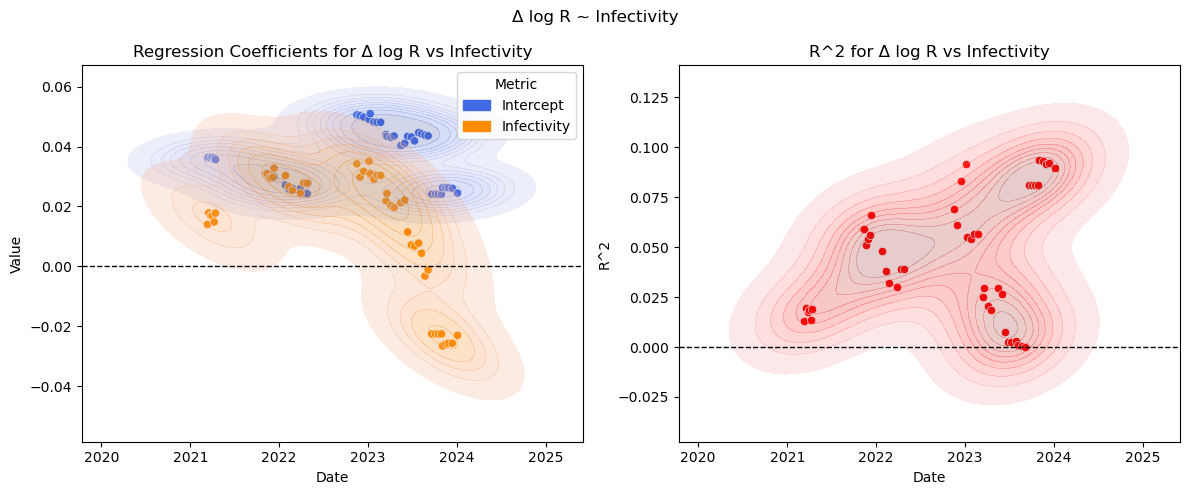

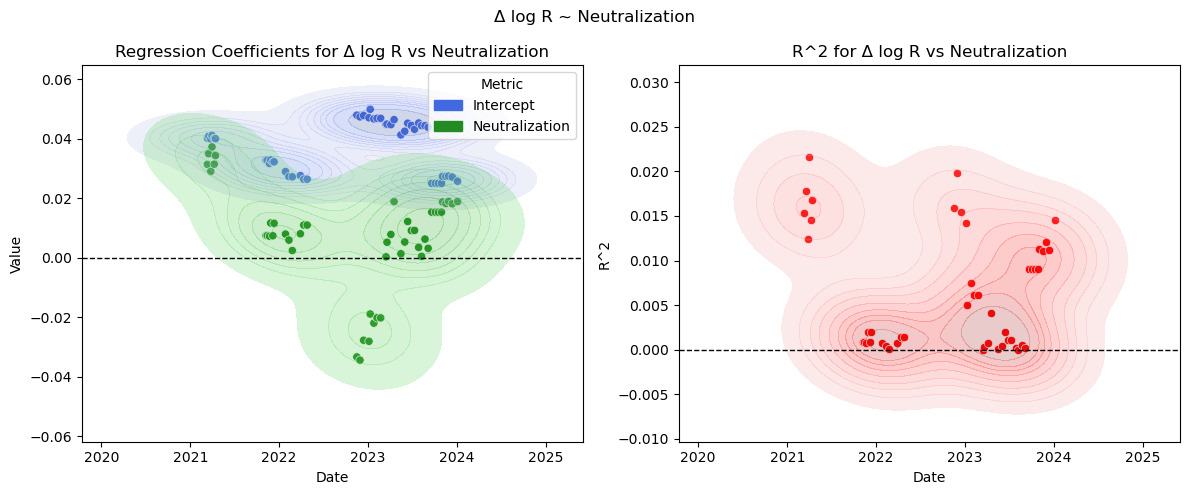

In [175]:
for e in ["Infectivity", "Neutralization"]:
    r = run_linreg(df, e)
    plot_scatter(r, e)